# Set up

In [1]:
import pandas as pd
import numpy as np
import plotly.express as pex
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import time


# Saves a figure to a file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("./figs", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
df = pd.read_csv('drinking_water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df_clean = df.dropna()

In [7]:
#Mélanger les données 
from sklearn.utils import shuffle
df_clean = shuffle(df_clean)

In [8]:
y = df_clean.Potability
X = df_clean.drop(['Potability'],axis=1)
# ybis = y.reset_index(drop=True)
# Xbis = X.reset_index(drop=True)
# ybisbis = list(y)
# Xbisbis= list(X)

Scaler les données

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

X_scaled_df = mean_norm(X)


# Best subset selection

In [10]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.5, random_state=42)
X_train, X_test = train_test_split(X, test_size=0.5, random_state=42)

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

def processSubset_svm(feature_set):
    
    SVM_rbf = SVC()
    SVM_rbf.fit(X_train_scaled[list(feature_set)],y_train)
    y_pred = SVM_rbf.predict(X_test_scaled[list(feature_set)])
    f1 = f1_score(y_test, y_pred)
    return {"model":SVM_rbf, "f1":f1,"feature_set":feature_set}

def processSubset_clf(feature_set):
    
    clf = RandomForestClassifier()
    clf.fit(X_train[list(feature_set)],y_train)
    y_pred = clf.predict(X_test[list(feature_set)])
    f1 = f1_score(y_test, y_pred)
    return {"model":clf, "f1":f1, "feature_set":feature_set}


In [12]:
def getBest_svm(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset_svm(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest f1
    best_model = models.loc[models['f1'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

def getBest_clf(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset_clf(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest f1
    best_model = models.loc[models['f1'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [14]:
#Best model pour le Random Forest

models_best_clf = pd.DataFrame(columns=["f1", "model","feature_set"])

tic = time.time()
for i in range(1,10):
    models_best_clf.loc[i] = getBest_clf(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

models_best_clf

Processed 9 models on 1 predictors in 3.030031681060791 seconds.
Processed 36 models on 2 predictors in 7.140032529830933 seconds.
Processed 84 models on 3 predictors in 17.010632276535034 seconds.
Processed 126 models on 4 predictors in 35.67081689834595 seconds.
Processed 126 models on 5 predictors in 43.83721971511841 seconds.
Processed 84 models on 6 predictors in 22.309547901153564 seconds.
Processed 36 models on 7 predictors in 9.503102540969849 seconds.
Processed 9 models on 8 predictors in 2.4427285194396973 seconds.
Processed 1 models on 9 predictors in 0.37311697006225586 seconds.
Total elapsed time: 141.58028078079224 seconds.


,f1,model,feature_set
1,0.455726,"(DecisionTreeClassifier(max_features='auto', r...","(Hardness,)"
2,0.460490,"(DecisionTreeClassifier(max_features='auto', r...","(ph, Sulfate)"
3,0.526897,"(DecisionTreeClassifier(max_features='auto', r...","(ph, Chloramines, Sulfate)"
4,0.550642,"(DecisionTreeClassifier(max_features='auto', r...","(ph, Hardness, Chloramines, Sulfate)"
5,0.549640,"(DecisionTreeClassifier(max_features='auto', r...","(ph, Hardness, Chloramines, Sulfate, Turbidity)"
6,0.549419,"(DecisionTreeClassifier(max_features='auto', r...","(ph, Hardness, Solids, Chloramines, Sulfate, T..."
7,0.520710,"(DecisionTreeClassifier(max_features='auto', r...","(ph, Hardness, Solids, Chloramines, Sulfate, C..."
8,0.495356,"(DecisionTreeClassifier(max_features='auto', r...","(ph, Hardness, Solids, Chloramines, Sulfate, C..."
9,0.459807,"(DecisionTreeClassifier(max_features='auto', r...","(ph, Hardness, Solids, Chloramines, Sulfate, C..."


In [15]:
#Best model pour la SVM

models_best_svm = pd.DataFrame(columns=["f1", "model","feature_set"])

tic = time.time()
for i in range(1,10):
    models_best_svm.loc[i] = getBest_svm(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

models_best_svm

Processed 9 models on 1 predictors in 1.3396186828613281 seconds.
Processed 36 models on 2 predictors in 5.1284873485565186 seconds.
Processed 84 models on 3 predictors in 11.868234157562256 seconds.
Processed 126 models on 4 predictors in 16.821352243423462 seconds.
Processed 126 models on 5 predictors in 14.832014083862305 seconds.
Processed 84 models on 6 predictors in 12.068490982055664 seconds.
Processed 36 models on 7 predictors in 4.252731561660767 seconds.
Processed 9 models on 8 predictors in 1.0932064056396484 seconds.
Processed 1 models on 9 predictors in 0.10396432876586914 seconds.
Total elapsed time: 67.53482747077942 seconds.


,f1,model,feature_set
1,0.219512,SVC(),"(Sulfate,)"
2,0.330855,SVC(),"(ph, Sulfate)"
3,0.442539,SVC(),"(ph, Hardness, Sulfate)"
4,0.490196,SVC(),"(ph, Hardness, Solids, Sulfate)"
5,0.504854,SVC(),"(ph, Hardness, Solids, Chloramines, Sulfate)"
6,0.496732,SVC(),"(ph, Hardness, Solids, Chloramines, Sulfate, O..."
7,0.486842,SVC(),"(ph, Hardness, Solids, Chloramines, Sulfate, O..."
8,0.466216,SVC(),"(ph, Hardness, Solids, Chloramines, Sulfate, C..."
9,0.444062,SVC(),"(ph, Hardness, Solids, Chloramines, Sulfate, C..."


In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

# Build RF classifier to use in feature selection
SVM_rbf = SVC()
clf = RandomForestClassifier()

def forward_selection(model,X,y):

    # Build step forward feature selection
    sfs1 = sfs(model,
            k_features=9,
            forward=True,
            floating=False,
            verbose=2,
            scoring='f1',
            cv=5)

    # Perform SFFS
    feature_names = X.columns
    sfs1 = sfs1.fit(X, y,custom_feature_names=feature_names)

    return sfs1.subsets_


In [17]:
clf_sfs = forward_selection(clf,X,y)
print(clf_sfs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.3s finished

[2021-11-07 19:29:02] Features: 1/9 -- score: 0.425595789059053[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.3s finished

[2021-11-07 19:29:13] Features: 2/9 -- score: 0.4291146335570642[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.1s finished

[2021-11-07 19:29:23] Features: 3/9 -- score: 0.5140198440563395[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

{1: {'feature_idx': (1,), 'cv_scores': array([0.43373494, 0.4238806 , 0.49404762, 0.35526316, 0.42105263]), 'avg_score': 0.425595789059053, 'feature_names': ('Hardness',)}, 2: {'feature_idx': (1, 4), 'cv_scores': array([0.3902439 , 0.47524752, 0.43262411, 0.4       , 0.44745763]), 'avg_score': 0.4291146335570642, 'feature_names': ('Hardness', 'Sulfate')}, 3: {'feature_idx': (0, 1, 4), 'cv_scores': array([0.4742268 , 0.54676259, 0.55123675, 0.49275362, 0.50511945]), 'avg_score': 0.5140198440563395, 'feature_names': ('ph', 'Hardness', 'Sulfate')}, 4: {'feature_idx': (0, 1, 3, 4), 'cv_scores': array([0.54109589, 0.56428571, 0.58450704, 0.52363636, 0.57241379]), 'avg_score': 0.5571877607380012, 'feature_names': ('ph', 'Hardness', 'Chloramines', 'Sulfate')}, 5: {'feature_idx': (0, 1, 2, 3, 4), 'cv_scores': array([0.50526316, 0.59183673, 0.55395683, 0.51470588, 0.57564576]), 'avg_score': 0.5482816731862987, 'feature_names': ('ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate')}, 6: {'featur

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s finished

[2021-11-07 19:30:09] Features: 9/9 -- score: 0.506666443474353

In [18]:
svm_sfs = forward_selection(SVM_rbf,X_scaled_df,y)
print(svm_sfs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.9s finished

[2021-11-07 19:30:18] Features: 1/9 -- score: 0.221747780684457[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.7s finished

[2021-11-07 19:30:26] Features: 2/9 -- score: 0.34102359255831455[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.2s finished

[2021-11-07 19:30:32] Features: 3/9 -- score: 0.46699385502961965[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

{1: {'feature_idx': (4,), 'cv_scores': array([0.22772277, 0.24      , 0.22797927, 0.20895522, 0.20408163]), 'avg_score': 0.221747780684457, 'feature_names': ('Sulfate',)}, 2: {'feature_idx': (0, 4), 'cv_scores': array([0.37168142, 0.33944954, 0.33944954, 0.34234234, 0.31219512]), 'avg_score': 0.34102359255831455, 'feature_names': ('ph', 'Sulfate')}, 3: {'feature_idx': (0, 1, 4), 'cv_scores': array([0.44444444, 0.50199203, 0.42982456, 0.42372881, 0.53497942]), 'avg_score': 0.46699385502961965, 'feature_names': ('ph', 'Hardness', 'Sulfate')}, 4: {'feature_idx': (0, 1, 3, 4), 'cv_scores': array([0.50583658, 0.59459459, 0.5       , 0.47346939, 0.54918033]), 'avg_score': 0.524616177218807, 'feature_names': ('ph', 'Hardness', 'Chloramines', 'Sulfate')}, 5: {'feature_idx': (0, 1, 2, 3, 4), 'cv_scores': array([0.53754941, 0.60606061, 0.50819672, 0.50202429, 0.55144033]), 'avg_score': 0.5410542710405577, 'feature_names': ('ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate')}, 6: {'feature_idx'

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished

[2021-11-07 19:30:47] Features: 9/9 -- score: 0.4791431312511286

In [19]:
best_sfs_model_svm_int = pd.DataFrame(svm_sfs)
best_sfs_model_svm = best_sfs_model_svm_int.transpose()
best_sfs_model_svm

,feature_idx,cv_scores,avg_score,feature_names
1,"(4,)","[0.2277227722772277, 0.24, 0.22797927461139897...",0.221748,"(Sulfate,)"
2,"(0, 4)","[0.37168141592920356, 0.33944954128440363, 0.3...",0.341024,"(ph, Sulfate)"
3,"(0, 1, 4)","[0.4444444444444444, 0.5019920318725101, 0.429...",0.466994,"(ph, Hardness, Sulfate)"
4,"(0, 1, 3, 4)","[0.5058365758754862, 0.5945945945945946, 0.5, ...",0.524616,"(ph, Hardness, Chloramines, Sulfate)"
5,"(0, 1, 2, 3, 4)","[0.5375494071146244, 0.6060606060606061, 0.508...",0.541054,"(ph, Hardness, Solids, Chloramines, Sulfate)"
6,"(0, 1, 2, 3, 4, 6)","[0.53125, 0.5758754863813229, 0.49792531120331...",0.531754,"(ph, Hardness, Solids, Chloramines, Sulfate, O..."
7,"(0, 1, 2, 3, 4, 6, 7)","[0.4758064516129033, 0.5627376425855514, 0.497...",0.506185,"(ph, Hardness, Solids, Chloramines, Sulfate, O..."
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.48437500000000006, 0.5551330798479087, 0.48...",0.507215,"(ph, Hardness, Solids, Chloramines, Sulfate, C..."
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.4380165289256198, 0.564885496183206, 0.4481...",0.479143,"(ph, Hardness, Solids, Chloramines, Sulfate, C..."


In [20]:
best_sfs_model_clf_int = pd.DataFrame(clf_sfs)
best_sfs_model_clf = best_sfs_model_clf_int.transpose()
best_sfs_model_clf

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)","[0.4337349397590361, 0.4238805970149254, 0.494...",0.425596,"(Hardness,)"
2,"(1, 4)","[0.39024390243902435, 0.4752475247524752, 0.43...",0.429115,"(Hardness, Sulfate)"
3,"(0, 1, 4)","[0.4742268041237114, 0.5467625899280575, 0.551...",0.51402,"(ph, Hardness, Sulfate)"
4,"(0, 1, 3, 4)","[0.5410958904109588, 0.5642857142857143, 0.584...",0.557188,"(ph, Hardness, Chloramines, Sulfate)"
5,"(0, 1, 2, 3, 4)","[0.5052631578947369, 0.5918367346938775, 0.553...",0.548282,"(ph, Hardness, Solids, Chloramines, Sulfate)"
6,"(0, 1, 2, 3, 4, 7)","[0.48936170212765967, 0.624113475177305, 0.550...",0.540564,"(ph, Hardness, Solids, Chloramines, Sulfate, T..."
7,"(0, 1, 2, 3, 4, 5, 7)","[0.50187265917603, 0.5674740484429066, 0.54615...",0.531465,"(ph, Hardness, Solids, Chloramines, Sulfate, C..."
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.4732824427480916, 0.5338345864661654, 0.517...",0.511227,"(ph, Hardness, Solids, Chloramines, Sulfate, C..."
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.4754716981132075, 0.5313653136531366, 0.481...",0.506666,"(ph, Hardness, Solids, Chloramines, Sulfate, C..."


Text(0.5, 1.0, 'Best subset selection - SVM')

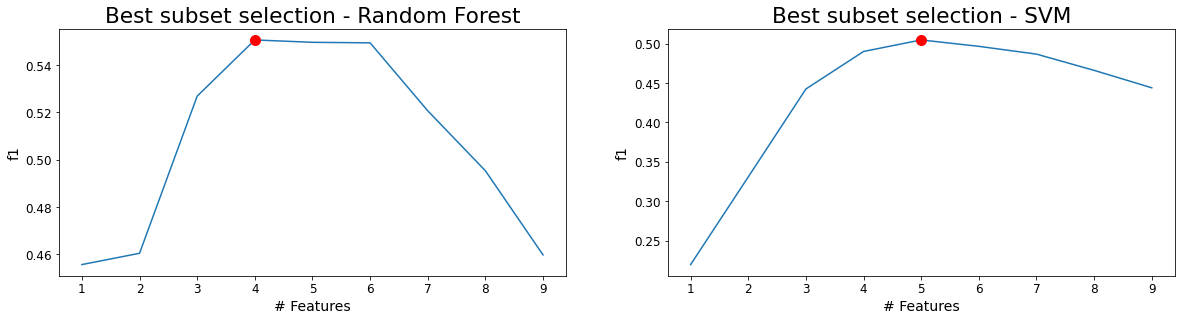

In [21]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the lowest RSS value.
# The argmax() function can be used to identify the location of the minimum point of a vector.
f1 = models_best_clf["f1"]
plt.plot(f1)
plt.plot(f1.argmax()+1, f1.max(), "or")
plt.xlabel(f'# Features')
plt.ylabel('f1')
plt.title('Best subset selection - Random Forest')

plt.subplot(2, 2, 2)
f1 = models_best_svm["f1"]
plt.plot(f1)
plt.plot(f1.argmax()+1, f1.max(), "or")
plt.xlabel(f'# Features')
plt.ylabel('f1')
plt.title('Best subset selection - SVM')

Text(0.5, 1.0, 'SFS selection - SVM')

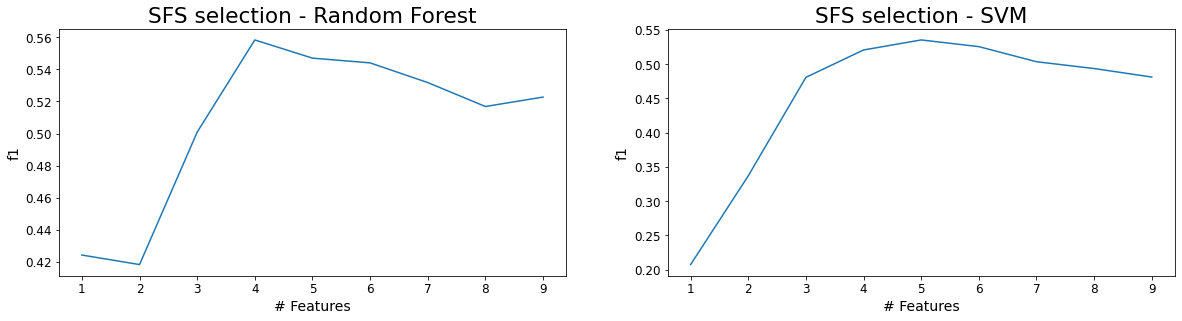

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the lowest RSS value.
# The argmax() function can be used to identify the location of the minimum point of a vector.
f1 = best_sfs_model_clf["avg_score"]
plt.plot(f1)
#plt.plot(f1.argmax()+1, f1.max(), "or")
plt.xlabel(f'# Features')
plt.ylabel('f1')
plt.title('SFS selection - Random Forest')

plt.subplot(2, 2, 2)
f1 = best_sfs_model_svm["avg_score"]
plt.plot(f1)
#plt.plot(f1.argmax()+1, f1.max(), "or")
plt.xlabel('# Features')
plt.ylabel('f1')
plt.title('SFS selection - SVM')